# Data Analysis of the PeTaL Labeled Dataset

# Author(s)
- Author1 = {"name": "David Smith", "affiliation": "NASA GRC", "email": "dacasm@umich.edu"}

# Purpose
The purpose of this notebook is to explore our labeled dataset and reveal any information which will help us improve the dataset and potentially increase the accuracy of our NLP labelers.

# Results

## 06-29-2021
25% of our unique labels account for 66.31% of the total amount of labels used. Additionally 13.43% of our unique labels are used less than 10 times. Some of the best practices dictated from organizations such as Google are:
- A dataset should have at least 10 examples of a label to ensure the model is able to learn it.
- Labels should have a similar number of examples to prevent the model from overfitting.

### Suggested Next Steps
It may help our model short-term to remove underused labels and to trim overused labels. The better solution is to balance out our dataset by increasing the amount of examples representing the underused labels and to simply have more data.

# Setup

## Library Import

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# Data Processing and Analysis

## Reformat Data

Convert data in to Pandas dataframes.

In [23]:
labeled_data = pd.read_csv('./labeled_data.csv')
taxonomy_data = pd.read_csv('./taxonomy.csv')
labeled_data.fillna('[]', inplace = True)

Pull all unique labels into a flat list.

In [24]:
taxonomy_labels = []

for column in taxonomy_data.columns:
    taxonomy_labels += list(taxonomy_data[column].dropna().values)

Create object which will contain additionally mined data.

In [25]:
analysis_object = {}
label_info = {
    "Absolute Label Frequency": {},
    "Relative Label Frequency": {}
}

Mine data to find:
- Absolute Label Frequency
- Relative Label Frequency
- Total Number of Labels
- Number of Words in Each Label

In [26]:
# Iterate through each row within our csv

for index, row in labeled_data.iterrows():

    # Look through each label and increment label counter if found
    for i in range(1,4):
        for label in eval(row["label_level_{}".format(i)]):
            if (label in taxonomy_labels):
                label_count = label_info["Absolute Label Frequency"].get(label, 0)
                label_info["Absolute Label Frequency"][label] = label_count + 1

# Compute Total Number of Labels and Relative Label Frequency
label_info["Total Number of Labels"] = sum(label_info["Absolute Label Frequency"].values())

for label in label_info["Absolute Label Frequency"].keys():
    label_info["Relative Label Frequency"][label] = round((label_info["Absolute Label Frequency"][label] / label_info["Total Number of Labels"]), 4) * 100


Convert object into dataframe

In [27]:
# Drop Total Number of Labels as it is an aggregate value.
label_dataframe = pd.DataFrame(label_info).drop("Total Number of Labels", axis = 1)

# Count and store the amount of words in each label
label_dataframe["Label Length"] = label_dataframe.index.map(lambda label: len(re.split("\W", label)))

## Visualization and Metrics

Frequency of Absolute Label Counts depicts the number of times a unique label is used versus (e.x. A frequency of 40 and a range of 0-25 means that 40 unique labels were used between 0 and 25 times).

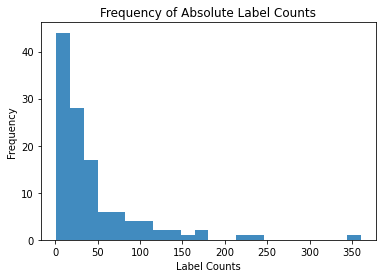

In [64]:
# Plot a histogram depicting the counts of frequencies of labels used.
fig = label_dataframe["Absolute Label Frequency"].plot.hist(bins = 22, alpha=0.85, title = "Frequency of Absolute Label Counts")
plt.xlabel("Label Counts")

# Save Figure
fig.figure.patch.set_facecolor('#FFF')
plt.savefig("././data-figures/freq_of_abs_label_counts.png", edgecolor="black")

plt.show()

In [29]:
# Compare the number of unique labels and their total relative percentage between the upper and lower data in terms of usage.
upper_half_label_dataframe = label_dataframe["Absolute Label Frequency"][label_dataframe["Absolute Label Frequency"] > 50]
lower_half_label_dataframe = label_dataframe["Absolute Label Frequency"][label_dataframe["Absolute Label Frequency"] <= 50]
low_rep_label_dataframe = label_dataframe["Absolute Label Frequency"][label_dataframe["Absolute Label Frequency"] < 10]

print("Total Number of Labels: {}".format(label_info["Total Number of Labels"]))

print("\nCount of unique labels used more than 50 times: {}".format(upper_half_label_dataframe.shape[0]))
print("Percentage of the total frequency of labels: {:0.2%}".format(upper_half_label_dataframe.sum() / label_info['Total Number of Labels']))

print("\nCount of unique labels used less than or equal to 50 times: {}".format(lower_half_label_dataframe.shape[0]))
print("Percentage of the total frequency of labels: {:0.2%}".format(lower_half_label_dataframe.sum() / label_info['Total Number of Labels']))

print("\nCount of unique labels used less than 10 times: {}".format(low_rep_label_dataframe.shape[0]))
print("Percentage of the total number of unique labels: {:0.2%}".format(low_rep_label_dataframe.nunique() / label_dataframe["Absolute Label Frequency"].nunique()))

Total Number of Labels: 5117

Count of unique labels used more than 50 times: 30
Percentage of the total frequency of labels: 66.31%

Count of unique labels used less than or equal to 50 times: 89
Percentage of the total frequency of labels: 33.69%

Count of unique labels used less than 10 times: 26
Percentage of the total number of unique labels: 13.43%


## Save Data

In [30]:
label_dataframe.to_csv("./label_metrics.csv")

# References
- https://cloud.google.com/natural-language/automl/docs/beginners-guide#include-enough-labeled-examples-in-each-category
    - Google document dictating the best practices in NLP.